In [1]:
# pip3 install pandas-datareader
import pandas_datareader.data as web

In [2]:
import pandas as pd # pip3 install pandas on terminal 
import numpy as np # pip3 install numpy 
import matplotlib.pyplot as plt # pip3 install matplotlib
plt.style.use('fivethirtyeight') # style to make plots prettier

In [3]:
apple = web.DataReader('aapl'
                         , 'yahoo'
                         , start = '12/31/1989'
                        ).reset_index()
apple.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1990-01-02,0.334821,0.312500,0.314732,0.332589,183198400.0,0.265909
1,1990-01-03,0.339286,0.334821,0.339286,0.334821,207995200.0,0.267693
2,1990-01-04,0.345982,0.332589,0.341518,0.335938,221513600.0,0.268586
3,1990-01-05,0.341518,0.330357,0.337054,0.337054,123312000.0,0.269478
4,1990-01-08,0.339286,0.330357,0.334821,0.339286,101572800.0,0.271263


In [4]:
apple.shape

(7801, 7)

In [5]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7801 entries, 0 to 7800
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7801 non-null   datetime64[ns]
 1   High       7801 non-null   float64       
 2   Low        7801 non-null   float64       
 3   Open       7801 non-null   float64       
 4   Close      7801 non-null   float64       
 5   Volume     7801 non-null   float64       
 6   Adj Close  7801 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 426.7 KB


In [6]:
micro = web.DataReader('msft'
                        , 'yahoo'
                        , start = '12/31/1989'
                       ).reset_index()
micro.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1990-01-02,0.616319,0.598090,0.605903,0.616319,53033600.0,0.392357
1,1990-01-03,0.626736,0.614583,0.621528,0.619792,113772800.0,0.394568
2,1990-01-04,0.638889,0.616319,0.619792,0.638021,125740800.0,0.406173
3,1990-01-05,0.638889,0.621528,0.635417,0.622396,69564800.0,0.396226
4,1990-01-08,0.631944,0.614583,0.621528,0.631944,58982400.0,0.402304


In [7]:
micro.shape

(7801, 7)

In [8]:
ibm = web.DataReader('ibm'
                        , 'yahoo'
                        , start = '12/31/1989'
                       ).reset_index()
ibm.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1990-01-02,24.53125,23.62500,23.68750,24.50000,7041600.0,12.057833
1,1990-01-03,24.87500,24.59375,24.68750,24.71875,9464000.0,12.165504
2,1990-01-04,25.09375,24.71875,24.75000,25.00000,9674800.0,12.303916
3,1990-01-05,25.40625,24.87500,24.96875,24.93750,7570000.0,12.273159
4,1990-01-08,25.21875,24.81250,24.81250,25.09375,4625200.0,12.350060


In [9]:
ibm.shape

(7801, 7)

In [10]:
intel = web.DataReader('intc'
                        , 'yahoo'
                        , start = '12/31/1989'
                       ).reset_index()
intel.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1990-01-02,1.125000,1.062500,1.078125,1.125000,63833600.0,0.693848
1,1990-01-03,1.132812,1.093750,1.125000,1.093750,69504000.0,0.674574
2,1990-01-04,1.125000,1.078125,1.101562,1.117188,58483200.0,0.689029
3,1990-01-05,1.125000,1.101562,1.117188,1.109375,37036800.0,0.684211
4,1990-01-08,1.132812,1.109375,1.117188,1.125000,43305600.0,0.693848


In [11]:
intel.shape

(7801, 7)

In [12]:
amd = web.DataReader('amd'
                        , 'yahoo'
                        , start = '12/31/1989'
                       ).reset_index()
amd.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1990-01-02,4.1250,3.8125,3.9375,4.1250,2544000.0,4.1250
1,1990-01-03,4.1250,3.9375,4.0625,4.0000,686800.0,4.0000
2,1990-01-04,4.0625,3.8750,4.0000,3.9375,944200.0,3.9375
3,1990-01-05,3.8125,3.6875,3.8125,3.8125,1511000.0,3.8125
4,1990-01-08,3.8125,3.7500,3.8125,3.8125,477000.0,3.8125


In [13]:
amd.shape

(7801, 7)

In [14]:
oracle = web.DataReader('orcl'
                        , 'yahoo'
                        , start = '12/31/1989'
                       ).reset_index()
oracle.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1990-01-02,0.598765,0.567901,0.577160,0.595679,35510400.0,0.511959
1,1990-01-03,0.601852,0.527778,0.595679,0.530864,179844000.0,0.456254
2,1990-01-04,0.546296,0.518519,0.530864,0.546296,125278000.0,0.469517
3,1990-01-05,0.546296,0.509259,0.546296,0.515432,51017200.0,0.442991
4,1990-01-08,0.540123,0.503086,0.515432,0.533951,33161200.0,0.458907


In [15]:
oracle.shape

(7801, 7)

In [16]:
hp = web.DataReader('hp'
                        , 'yahoo'
                        , start = '12/31/1989'
                       ).reset_index()
hp.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1990-01-02,8.68750,8.56250,8.62500,8.62500,643200.0,3.317538
1,1990-01-03,8.56250,8.28125,8.56250,8.28125,318800.0,3.185317
2,1990-01-04,8.15625,8.03125,8.09375,8.06250,254000.0,3.101178
3,1990-01-05,8.12500,7.96875,8.00000,8.12500,185600.0,3.125219
4,1990-01-08,8.31250,8.03125,8.06250,8.31250,178400.0,3.197339


In [17]:
hp.shape

(7801, 7)

In [18]:
hp = hp[['Date', 'Open', 'Close', 'Volume']]
hp.head()

,Date,Open,Close,Volume
0,1990-01-02,8.62500,8.62500,643200.0
1,1990-01-03,8.56250,8.28125,318800.0
2,1990-01-04,8.09375,8.06250,254000.0
3,1990-01-05,8.00000,8.12500,185600.0
4,1990-01-08,8.06250,8.31250,178400.0


In [19]:
# create a new column 
hp['difference'] = hp.Close - hp.Open
hp.head()

,Date,Open,Close,Volume,difference
0,1990-01-02,8.62500,8.62500,643200.0,0.00000
1,1990-01-03,8.56250,8.28125,318800.0,-0.28125
2,1990-01-04,8.09375,8.06250,254000.0,-0.03125
3,1990-01-05,8.00000,8.12500,185600.0,0.12500
4,1990-01-08,8.06250,8.31250,178400.0,0.25000


In [20]:
# find cumulative sum of difference
hp['diff_cumsum'] = hp['difference'].cumsum()
hp.head()

,Date,Open,Close,Volume,difference,diff_cumsum
0,1990-01-02,8.62500,8.62500,643200.0,0.00000,0.00000
1,1990-01-03,8.56250,8.28125,318800.0,-0.28125,-0.28125
2,1990-01-04,8.09375,8.06250,254000.0,-0.03125,-0.31250
3,1990-01-05,8.00000,8.12500,185600.0,0.12500,-0.18750
4,1990-01-08,8.06250,8.31250,178400.0,0.25000,0.06250


In [21]:
hp['percent_change'] = (hp['Close'] - hp['Open']) / hp['Open'] * 100
hp.head()

,Date,Open,Close,Volume,difference,diff_cumsum,percent_change
0,1990-01-02,8.62500,8.62500,643200.0,0.00000,0.00000,0.000000
1,1990-01-03,8.56250,8.28125,318800.0,-0.28125,-0.28125,-3.284672
2,1990-01-04,8.09375,8.06250,254000.0,-0.03125,-0.31250,-0.386100
3,1990-01-05,8.00000,8.12500,185600.0,0.12500,-0.18750,1.562500
4,1990-01-08,8.06250,8.31250,178400.0,0.25000,0.06250,3.100775


In [22]:
hp.columns

Index(['Date', 'Open', 'Close', 'Volume', 'difference', 'diff_cumsum',
       'percent_change'],
      dtype='object')

In [23]:
hp = hp[['Date', 'Volume', 'diff_cumsum', 'Open', 'Close', 'difference', 'percent_change']]
hp.head()

,Date,Volume,diff_cumsum,Open,Close,difference,percent_change
0,1990-01-02,643200.0,0.00000,8.62500,8.62500,0.00000,0.000000
1,1990-01-03,318800.0,-0.28125,8.56250,8.28125,-0.28125,-3.284672
2,1990-01-04,254000.0,-0.31250,8.09375,8.06250,-0.03125,-0.386100
3,1990-01-05,185600.0,-0.18750,8.00000,8.12500,0.12500,1.562500
4,1990-01-08,178400.0,0.06250,8.06250,8.31250,0.25000,3.100775


In [24]:
# iloc finds the row based on index 
hp.iloc[0]

Date              1990-01-02 00:00:00
Volume                         643200
diff_cumsum                         0
Open                            8.625
Close                           8.625
difference                          0
percent_change                      0
Name: 0, dtype: object

In [25]:
hp.iloc[:10] # slicing rows

,Date,Volume,diff_cumsum,Open,Close,difference,percent_change
0,1990-01-02,643200.0,0.00000,8.62500,8.62500,0.00000,0.000000
1,1990-01-03,318800.0,-0.28125,8.56250,8.28125,-0.28125,-3.284672
2,1990-01-04,254000.0,-0.31250,8.09375,8.06250,-0.03125,-0.386100
3,1990-01-05,185600.0,-0.18750,8.00000,8.12500,0.12500,1.562500
4,1990-01-08,178400.0,0.06250,8.06250,8.31250,0.25000,3.100775
5,1990-01-09,240800.0,-0.12500,8.31250,8.12500,-0.18750,-2.255639
6,1990-01-10,73600.0,-0.09375,8.12500,8.15625,0.03125,0.384615
7,1990-01-11,169600.0,-0.03125,8.21875,8.28125,0.06250,0.760456
8,1990-01-12,89600.0,-0.25000,8.15625,7.93750,-0.21875,-2.681992
9,1990-01-15,219600.0,-0.06250,7.75000,7.93750,0.18750,2.419355


In [26]:
# loc to find specific locations, .loc[index, column]
hp.loc[0, 'Open']

8.625

In [27]:
hp.loc[hp.Date >= '2010-11-01',] # loc more useful for analytics

,Date,Volume,diff_cumsum,Open,Close,difference,percent_change
5252,2010-11-01,602400.0,-12.872585,43.150002,42.700001,-0.450001,-1.042875
5253,2010-11-02,1072500.0,-12.682587,42.590000,42.779999,0.189999,0.446111
5254,2010-11-03,975400.0,-12.842587,42.939999,42.779999,-0.160000,-0.372613
5255,2010-11-04,1094800.0,-12.122585,43.270000,43.990002,0.720001,1.663973
5256,2010-11-05,782400.0,-12.402584,43.980000,43.700001,-0.279999,-0.636650
...,...,...,...,...,...,...,...
7796,2020-12-09,1573500.0,-56.722345,25.280001,24.639999,-0.640001,-2.531651
7797,2020-12-10,1935700.0,-55.582346,24.600000,25.740000,1.139999,4.634144
7798,2020-12-11,992800.0,-55.832346,25.559999,25.309999,-0.250000,-0.978091
7799,2020-12-14,1801200.0,-57.212345,25.500000,24.120001,-1.379999,-5.411761


In [28]:
hp.iloc[5252:] # more useful for modeling for train test split of dataframe 

,Date,Volume,diff_cumsum,Open,Close,difference,percent_change
5252,2010-11-01,602400.0,-12.872585,43.150002,42.700001,-0.450001,-1.042875
5253,2010-11-02,1072500.0,-12.682587,42.590000,42.779999,0.189999,0.446111
5254,2010-11-03,975400.0,-12.842587,42.939999,42.779999,-0.160000,-0.372613
5255,2010-11-04,1094800.0,-12.122585,43.270000,43.990002,0.720001,1.663973
5256,2010-11-05,782400.0,-12.402584,43.980000,43.700001,-0.279999,-0.636650
...,...,...,...,...,...,...,...
7796,2020-12-09,1573500.0,-56.722345,25.280001,24.639999,-0.640001,-2.531651
7797,2020-12-10,1935700.0,-55.582346,24.600000,25.740000,1.139999,4.634144
7798,2020-12-11,992800.0,-55.832346,25.559999,25.309999,-0.250000,-0.978091
7799,2020-12-14,1801200.0,-57.212345,25.500000,24.120001,-1.379999,-5.411761


In [29]:
hp.loc[hp.percent_change > 1]

,Date,Volume,diff_cumsum,Open,Close,difference,percent_change
3,1990-01-05,185600.0,-0.187500,8.000000,8.125000,0.125000,1.562500
4,1990-01-08,178400.0,0.062500,8.062500,8.312500,0.250000,3.100775
9,1990-01-15,219600.0,-0.062500,7.750000,7.937500,0.187500,2.419355
11,1990-01-17,143200.0,-0.156250,7.750000,7.843750,0.093750,1.209677
12,1990-01-18,198800.0,0.093750,7.843750,8.093750,0.250000,3.187251
...,...,...,...,...,...,...,...
7791,2020-12-02,1711400.0,-58.182344,23.000000,23.969999,0.969999,4.217388
7794,2020-12-07,1449700.0,-57.192345,24.030001,24.750000,0.719999,2.996252
7795,2020-12-08,1316500.0,-56.082344,24.170000,25.280001,1.110001,4.592473
7797,2020-12-10,1935700.0,-55.582346,24.600000,25.740000,1.139999,4.634144


In [30]:
# find interday change of prices
hp.iloc[:2]

,Date,Volume,diff_cumsum,Open,Close,difference,percent_change
0,1990-01-02,643200.0,0.00000,8.6250,8.62500,0.00000,0.000000
1,1990-01-03,318800.0,-0.28125,8.5625,8.28125,-0.28125,-3.284672


In [31]:
hp['Close_Shift1_Down'] = hp.Close.shift(1)
hp.head()

,Date,Volume,diff_cumsum,Open,Close,difference,percent_change,Close_Shift1_Down
0,1990-01-02,643200.0,0.00000,8.62500,8.62500,0.00000,0.000000,NaN
1,1990-01-03,318800.0,-0.28125,8.56250,8.28125,-0.28125,-3.284672,8.62500
2,1990-01-04,254000.0,-0.31250,8.09375,8.06250,-0.03125,-0.386100,8.28125
3,1990-01-05,185600.0,-0.18750,8.00000,8.12500,0.12500,1.562500,8.06250
4,1990-01-08,178400.0,0.06250,8.06250,8.31250,0.25000,3.100775,8.12500


In [32]:
hp['interday'] = hp.Close_Shift1_Down - hp.Open
hp.head()

,Date,Volume,diff_cumsum,Open,Close,difference,percent_change,Close_Shift1_Down,interday
0,1990-01-02,643200.0,0.00000,8.62500,8.62500,0.00000,0.000000,NaN,NaN
1,1990-01-03,318800.0,-0.28125,8.56250,8.28125,-0.28125,-3.284672,8.62500,0.0625
2,1990-01-04,254000.0,-0.31250,8.09375,8.06250,-0.03125,-0.386100,8.28125,0.1875
3,1990-01-05,185600.0,-0.18750,8.00000,8.12500,0.12500,1.562500,8.06250,0.0625
4,1990-01-08,178400.0,0.06250,8.06250,8.31250,0.25000,3.100775,8.12500,0.0625


In [33]:
# get rid of row index 0
# hp = hp[1:]

In [34]:
# find null values
hp.isna().sum()

Date                 0
Volume               0
diff_cumsum          0
Open                 0
Close                0
difference           0
percent_change       0
Close_Shift1_Down    1
interday             1
dtype: int64

In [35]:
# fill null values with .fillna(0)
hp = hp.fillna(0)

In [36]:
hp.isna().sum()

Date                 0
Volume               0
diff_cumsum          0
Open                 0
Close                0
difference           0
percent_change       0
Close_Shift1_Down    0
interday             0
dtype: int64

In [37]:
hp.head()

,Date,Volume,diff_cumsum,Open,Close,difference,percent_change,Close_Shift1_Down,interday
0,1990-01-02,643200.0,0.00000,8.62500,8.62500,0.00000,0.000000,0.00000,0.0000
1,1990-01-03,318800.0,-0.28125,8.56250,8.28125,-0.28125,-3.284672,8.62500,0.0625
2,1990-01-04,254000.0,-0.31250,8.09375,8.06250,-0.03125,-0.386100,8.28125,0.1875
3,1990-01-05,185600.0,-0.18750,8.00000,8.12500,0.12500,1.562500,8.06250,0.0625
4,1990-01-08,178400.0,0.06250,8.06250,8.31250,0.25000,3.100775,8.12500,0.0625


In [38]:
# statistics overall numerical data 
hp.describe()

,Volume,diff_cumsum,Open,Close,difference,percent_change,Close_Shift1_Down,interday
count,7.801000e+03,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000
mean,1.106053e+06,-7.952262,31.197564,31.190342,-0.007222,0.009665,31.187147,-0.009311
std,1.045066e+06,13.464100,24.571060,24.560930,0.827953,2.362802,24.563366,0.457331
min,1.120000e+04,-67.012350,4.562500,4.562500,-7.239998,-15.164907,0.000000,-3.549999
25%,4.121000e+05,-10.937500,11.406250,11.375000,-0.260000,-1.253192,11.343750,-0.119999
50%,9.196000e+05,-4.642494,20.360001,20.350000,0.000000,0.000000,20.350000,0.000000
75%,1.531800e+06,-1.343750,50.810001,50.799999,0.270000,1.250250,50.799999,0.065000
max,3.318140e+07,22.637543,118.610001,118.290001,6.300003,17.514370,118.290001,7.590000


In [39]:
# average of interday column
hp.interday.mean()

-0.009311286291546155

In [40]:
hp.interday.std()

0.4573307592019426

In [41]:
hp.interday.describe()

count    7801.000000
mean       -0.009311
std         0.457331
min        -3.549999
25%        -0.119999
50%         0.000000
75%         0.065000
max         7.590000
Name: interday, dtype: float64

<AxesSubplot:>

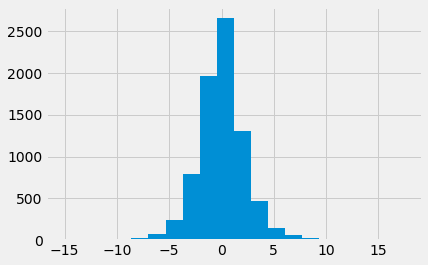

In [42]:
hp.percent_change.hist(bins = 20) # short way to graph histogram for pandas

In [43]:
# graph data prices vs time
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [44]:
hp.head(5)

,Date,Volume,diff_cumsum,Open,Close,difference,percent_change,Close_Shift1_Down,interday
0,1990-01-02,643200.0,0.00000,8.62500,8.62500,0.00000,0.000000,0.00000,0.0000
1,1990-01-03,318800.0,-0.28125,8.56250,8.28125,-0.28125,-3.284672,8.62500,0.0625
2,1990-01-04,254000.0,-0.31250,8.09375,8.06250,-0.03125,-0.386100,8.28125,0.1875
3,1990-01-05,185600.0,-0.18750,8.00000,8.12500,0.12500,1.562500,8.06250,0.0625
4,1990-01-08,178400.0,0.06250,8.06250,8.31250,0.25000,3.100775,8.12500,0.0625


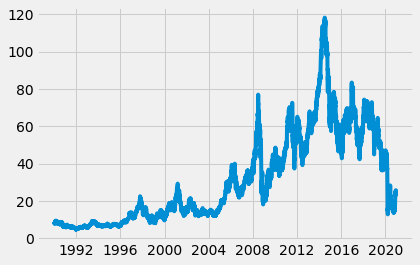

In [45]:
plt.plot(hp.Date # x values
         , hp.Close # y values
        );

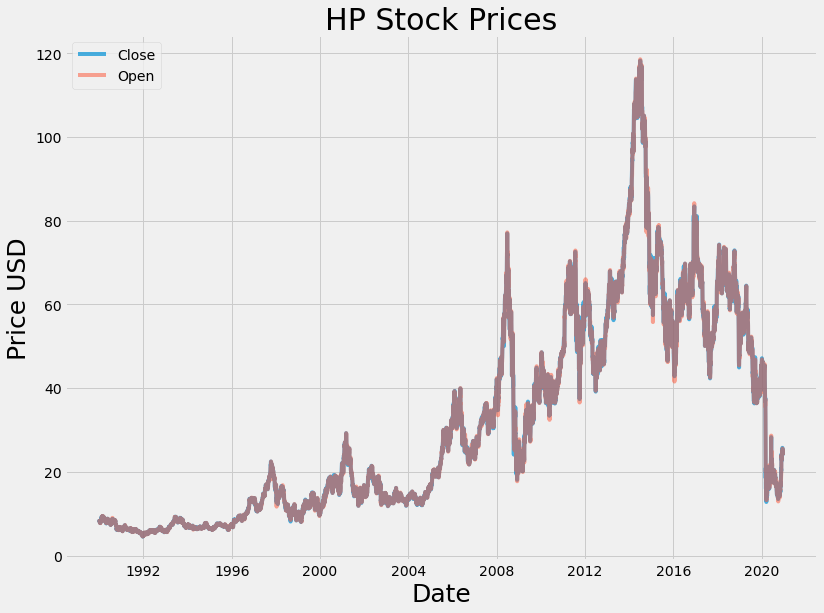

In [46]:
# customize title, labels and legends
plt.figure(figsize = (12,9))
plt.plot(hp.Date # x values
         , hp.Close # y1 values
         , label = 'Close'
         , alpha = 0.7
        )
plt.plot(hp.Date # x values
         , hp.Open # y2 values
         , label = 'Open'
         , alpha = 0.5
        )
plt.title('HP Stock Prices'
          , fontsize = 30
         )
plt.xlabel('Date'
           , fontsize = 25
          )
plt.ylabel('Price USD'
           , fontsize = 25
          )
plt.legend(loc = 'upper left');

In [47]:
apple.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1990-01-02,0.334821,0.312500,0.314732,0.332589,183198400.0,0.265909
1,1990-01-03,0.339286,0.334821,0.339286,0.334821,207995200.0,0.267693
2,1990-01-04,0.345982,0.332589,0.341518,0.335938,221513600.0,0.268586
3,1990-01-05,0.341518,0.330357,0.337054,0.337054,123312000.0,0.269478
4,1990-01-08,0.339286,0.330357,0.334821,0.339286,101572800.0,0.271263


In [48]:
micro.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1990-01-02,0.616319,0.598090,0.605903,0.616319,53033600.0,0.392357
1,1990-01-03,0.626736,0.614583,0.621528,0.619792,113772800.0,0.394568
2,1990-01-04,0.638889,0.616319,0.619792,0.638021,125740800.0,0.406173
3,1990-01-05,0.638889,0.621528,0.635417,0.622396,69564800.0,0.396226
4,1990-01-08,0.631944,0.614583,0.621528,0.631944,58982400.0,0.402304


In [49]:
df = apple[['Date', 'Close']].merge(micro[['Date', 'Close']]
                                   , on = 'Date'
                                  )
df.head()

,Date,Close_x,Close_y
0,1990-01-02,0.332589,0.616319
1,1990-01-03,0.334821,0.619792
2,1990-01-04,0.335938,0.638021
3,1990-01-05,0.337054,0.622396
4,1990-01-08,0.339286,0.631944


In [50]:
df.columns = ['Date', 'Apple', 'Microsoft']
df.head()

,Date,Apple,Microsoft
0,1990-01-02,0.332589,0.616319
1,1990-01-03,0.334821,0.619792
2,1990-01-04,0.335938,0.638021
3,1990-01-05,0.337054,0.622396
4,1990-01-08,0.339286,0.631944


In [51]:
df = df.merge(ibm[['Date', 'Close']]
              , on = 'Date'
             )
df.head()

,Date,Apple,Microsoft,Close
0,1990-01-02,0.332589,0.616319,24.50000
1,1990-01-03,0.334821,0.619792,24.71875
2,1990-01-04,0.335938,0.638021,25.00000
3,1990-01-05,0.337054,0.622396,24.93750
4,1990-01-08,0.339286,0.631944,25.09375


In [52]:
a = [-1, 2, 3, 4]
a[-1]

4

In [53]:
a[-1] = 5
a

[-1, 2, 3, 5]

In [54]:
type(df.columns)

pandas.core.indexes.base.Index

In [55]:
df['IBM'] = df['Close'] 
df.head()

,Date,Apple,Microsoft,Close,IBM
0,1990-01-02,0.332589,0.616319,24.50000,24.50000
1,1990-01-03,0.334821,0.619792,24.71875,24.71875
2,1990-01-04,0.335938,0.638021,25.00000,25.00000
3,1990-01-05,0.337054,0.622396,24.93750,24.93750
4,1990-01-08,0.339286,0.631944,25.09375,25.09375


In [56]:
df.drop('Close', axis = 1, inplace = True)
df

,Date,Apple,Microsoft,IBM
0,1990-01-02,0.332589,0.616319,24.500000
1,1990-01-03,0.334821,0.619792,24.718750
2,1990-01-04,0.335938,0.638021,25.000000
3,1990-01-05,0.337054,0.622396,24.937500
4,1990-01-08,0.339286,0.631944,25.093750
...,...,...,...,...
7796,2020-12-09,121.779999,211.800003,126.790001
7797,2020-12-10,123.239998,210.520004,124.959999
7798,2020-12-11,122.410004,213.259995,124.269997
7799,2020-12-14,121.779999,214.199997,123.529999


In [57]:
df = df.merge(intel[['Date', 'Close']]
              , on = 'Date'
             )
df.head()

,Date,Apple,Microsoft,IBM,Close
0,1990-01-02,0.332589,0.616319,24.50000,1.125000
1,1990-01-03,0.334821,0.619792,24.71875,1.093750
2,1990-01-04,0.335938,0.638021,25.00000,1.117188
3,1990-01-05,0.337054,0.622396,24.93750,1.109375
4,1990-01-08,0.339286,0.631944,25.09375,1.125000


In [58]:
dict_ = {'a': 1, 'b': 2, 'c': 3}
dict_['c']

3

In [59]:
# Column name reassignment using df.rename()
df.rename(columns = {'Close': 'Intel', 'ibm': 'IBM'}, inplace = True)
df.head()

,Date,Apple,Microsoft,IBM,Intel
0,1990-01-02,0.332589,0.616319,24.50000,1.125000
1,1990-01-03,0.334821,0.619792,24.71875,1.093750
2,1990-01-04,0.335938,0.638021,25.00000,1.117188
3,1990-01-05,0.337054,0.622396,24.93750,1.109375
4,1990-01-08,0.339286,0.631944,25.09375,1.125000


In [60]:
df = df.merge(amd[['Date', 'Close']]
              , on = 'Date'
             )
df.rename(columns = {'Close': 'AMD'}, inplace = True)
df.head()

,Date,Apple,Microsoft,IBM,Intel,AMD
0,1990-01-02,0.332589,0.616319,24.50000,1.125000,4.1250
1,1990-01-03,0.334821,0.619792,24.71875,1.093750,4.0000
2,1990-01-04,0.335938,0.638021,25.00000,1.117188,3.9375
3,1990-01-05,0.337054,0.622396,24.93750,1.109375,3.8125
4,1990-01-08,0.339286,0.631944,25.09375,1.125000,3.8125


In [61]:
df = df.merge(oracle[['Date', 'Close']]
              , on = 'Date'
             )
df.rename(columns = {'Close': 'Oracle'}, inplace = True)
df.head()

,Date,Apple,Microsoft,IBM,Intel,AMD,Oracle
0,1990-01-02,0.332589,0.616319,24.50000,1.125000,4.1250,0.595679
1,1990-01-03,0.334821,0.619792,24.71875,1.093750,4.0000,0.530864
2,1990-01-04,0.335938,0.638021,25.00000,1.117188,3.9375,0.546296
3,1990-01-05,0.337054,0.622396,24.93750,1.109375,3.8125,0.515432
4,1990-01-08,0.339286,0.631944,25.09375,1.125000,3.8125,0.533951


In [62]:
df = df.merge(hp[['Date', 'Close']]
              , on = 'Date'
             )
df.rename(columns = {'Close': 'HP'}, inplace = True)
df.head()

,Date,Apple,Microsoft,IBM,Intel,AMD,Oracle,HP
0,1990-01-02,0.332589,0.616319,24.50000,1.125000,4.1250,0.595679,8.62500
1,1990-01-03,0.334821,0.619792,24.71875,1.093750,4.0000,0.530864,8.28125
2,1990-01-04,0.335938,0.638021,25.00000,1.117188,3.9375,0.546296,8.06250
3,1990-01-05,0.337054,0.622396,24.93750,1.109375,3.8125,0.515432,8.12500
4,1990-01-08,0.339286,0.631944,25.09375,1.125000,3.8125,0.533951,8.31250


In [63]:
df.isna().sum()

Date         0
Apple        0
Microsoft    0
IBM          0
Intel        0
AMD          0
Oracle       0
HP           0
dtype: int64

In [64]:
df.describe()

,Apple,Microsoft,IBM,Intel,AMD,Oracle,HP
count,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000
mean,12.614229,36.669022,99.360487,24.041759,13.379319,20.935066,31.190342
std,20.947731,39.555312,55.500964,15.291785,12.626245,17.115057,24.560930
min,0.115513,0.598090,10.250000,0.910156,1.620000,0.132716,4.562500
25%,0.362143,16.593750,49.937500,15.890625,5.810000,4.593750,11.375000
50%,1.523036,27.400000,100.349998,22.650000,9.750000,16.875000,20.350000
75%,18.922142,39.937500,142.020004,32.000000,15.850000,34.930000,50.799999
max,134.179993,231.649994,215.800003,74.875000,97.120003,61.860001,118.290001


## How to make a data frame from dictionary

In [65]:
df_temp = {'name': ['Amy', 'April', 'Baron', 'Carlos', 'David', 'Emily', 'Frank']
           , 'age': [27, 38, 43, 32, 41, 33, 21]
           , 'state': ['CA', 'NY', 'NJ', 'NV', 'FL', 'OR', 'MN']
           , 'phone': ['ios', 'android', 'ios', 'ios', 'ios', 'android', 'ios']
           , 'social': ['twtr', 'tt', 'tt', 'tt', 'insta', 'insta', 'insta']
          }
df_temp = pd.DataFrame(df_temp) # with dictionary 
df_temp

,name,age,state,phone,social
0,Amy,27,CA,ios,twtr
1,April,38,NY,android,tt
2,Baron,43,NJ,ios,tt
3,Carlos,32,NV,ios,tt
4,David,41,FL,ios,insta
5,Emily,33,OR,android,insta
6,Frank,21,MN,ios,insta


In [66]:
df_temp.groupby('social')['age'].mean()

social
insta    31.666667
tt       37.666667
twtr     27.000000
Name: age, dtype: float64

In [67]:
df_temp.groupby('phone')['age'].std()

phone
android    3.535534
ios        9.284396
Name: age, dtype: float64

In [68]:
df_temp.groupby(['phone', 'social'])['age'].mean()

phone    social
android  insta     33.0
         tt        38.0
ios      insta     31.0
         tt        37.5
         twtr      27.0
Name: age, dtype: float64

## How to load csv

In [69]:
df_salary = pd.read_csv('./data/sf_salaries.csv' # with csv, use path
                         , low_memory=False
                        )
df_salary.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [70]:
df.head()

,Date,Apple,Microsoft,IBM,Intel,AMD,Oracle,HP
0,1990-01-02,0.332589,0.616319,24.50000,1.125000,4.1250,0.595679,8.62500
1,1990-01-03,0.334821,0.619792,24.71875,1.093750,4.0000,0.530864,8.28125
2,1990-01-04,0.335938,0.638021,25.00000,1.117188,3.9375,0.546296,8.06250
3,1990-01-05,0.337054,0.622396,24.93750,1.109375,3.8125,0.515432,8.12500
4,1990-01-08,0.339286,0.631944,25.09375,1.125000,3.8125,0.533951,8.31250


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7801 entries, 0 to 7800
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7801 non-null   datetime64[ns]
 1   Apple      7801 non-null   float64       
 2   Microsoft  7801 non-null   float64       
 3   IBM        7801 non-null   float64       
 4   Intel      7801 non-null   float64       
 5   AMD        7801 non-null   float64       
 6   Oracle     7801 non-null   float64       
 7   HP         7801 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 548.5 KB


In [72]:
# if 'Date' column is not in 'datetime' format, change by doing this
df['Date'] = pd.to_datetime(df['Date'])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7801 entries, 0 to 7800
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7801 non-null   datetime64[ns]
 1   Apple      7801 non-null   float64       
 2   Microsoft  7801 non-null   float64       
 3   IBM        7801 non-null   float64       
 4   Intel      7801 non-null   float64       
 5   AMD        7801 non-null   float64       
 6   Oracle     7801 non-null   float64       
 7   HP         7801 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 548.5 KB


In [74]:
df_month_avg = df.groupby(df.Date.dt.month).mean()

In [75]:
df_month_avg # not useful for our use case, averaged every jan, feb, mar, etc...

,Apple,Microsoft,IBM,Intel,AMD,Oracle,HP
Date,,,,,,,
1,10.804054,34.011523,97.096144,23.447183,12.313254,20.298330,30.503004
2,11.106999,34.444210,99.322538,23.808515,12.761425,20.600906,31.777121
3,11.076659,33.938794,98.714392,23.553791,13.112479,20.480487,31.570515
4,11.488228,35.136833,99.838590,23.991098,13.579731,20.673583,33.062434
5,11.904956,35.572870,100.417468,24.200282,14.168514,20.675137,32.508155
6,12.266307,36.514339,99.561171,24.118747,13.755697,20.914919,32.450835
7,12.890634,38.162151,100.728852,24.438982,13.180757,21.352451,32.139527
8,13.791456,37.922957,100.471406,24.364176,13.762954,21.141329,30.349078
9,14.181991,38.153054,100.464306,23.970245,13.937480,21.271158,30.164788


In [76]:
df = df.set_index('Date')

In [77]:
df.head()

,Apple,Microsoft,IBM,Intel,AMD,Oracle,HP
Date,,,,,,,
1990-01-02,0.332589,0.616319,24.50000,1.125000,4.1250,0.595679,8.62500
1990-01-03,0.334821,0.619792,24.71875,1.093750,4.0000,0.530864,8.28125
1990-01-04,0.335938,0.638021,25.00000,1.117188,3.9375,0.546296,8.06250
1990-01-05,0.337054,0.622396,24.93750,1.109375,3.8125,0.515432,8.12500
1990-01-08,0.339286,0.631944,25.09375,1.125000,3.8125,0.533951,8.31250


In [78]:
df_month_avg = df.resample('M').agg(np.mean)

In [79]:
df_month_avg[:24]

,Apple,Microsoft,IBM,Intel,AMD,Oracle,HP
Date,,,,,,,
1990-01-31,0.312043,0.625513,24.603693,1.153764,3.801136,0.506033,8.136364
1990-02-28,0.302690,0.666484,25.601974,1.238281,3.713816,0.546134,9.050987
1990-03-31,0.344765,0.756589,26.555398,1.292081,4.619318,0.596240,8.887784
1990-04-30,0.364676,0.814236,26.987500,1.284375,4.381250,0.411728,8.154687
1990-05-31,0.366629,0.931818,28.654830,1.398793,4.931818,0.452581,8.373580
1990-06-30,0.361235,1.045304,29.769345,1.470982,4.788690,0.537919,8.141369
1990-07-31,0.391688,1.017774,29.315476,1.455543,4.273810,0.473839,7.708333
1990-08-31,0.342731,0.848128,25.842391,1.133832,2.861413,0.354402,8.357337
1990-09-30,0.294467,0.824927,26.399671,1.021382,2.832237,0.193795,8.228618


In [80]:
df_yearly_avg = df.resample('Y').agg(np.mean)

In [81]:
df_yearly_avg

,Apple,Microsoft,IBM,Intel,AMD,Oracle,HP
Date,,,,,,,
1990-12-31,0.335373,0.864535,27.182806,1.232136,3.569664,0.381130,7.888340
1991-12-31,0.468701,1.610387,26.396245,1.448678,5.596097,0.259235,5.974679
1992-12-31,0.489309,2.505885,20.968627,1.921229,7.485974,0.454834,5.835507
1993-12-31,0.366310,2.608742,12.287426,3.615875,11.782115,1.162007,7.612031
1994-12-31,0.304291,3.205016,15.719990,3.927583,12.647569,1.844258,6.838914
1995-12-31,0.361966,5.190530,22.976687,6.889121,15.300595,2.756549,6.960441
1996-12-31,0.222495,7.544214,29.282788,10.176243,8.827510,4.161046,9.923228
1997-12-31,0.160418,15.119256,45.162688,19.878258,16.895010,5.215340,15.388772
1998-12-31,0.272901,24.630921,62.226438,21.355794,10.632285,4.536903,12.144593


## Moving Averages

In [82]:
lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
lst[0]

1

In [83]:
for idx in range(len(lst)):
    if idx >= 3-1:
        print((lst[idx-2] + lst[idx-1] + lst[idx])/(3))        

2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0


In [84]:
df.head()

,Apple,Microsoft,IBM,Intel,AMD,Oracle,HP
Date,,,,,,,
1990-01-02,0.332589,0.616319,24.50000,1.125000,4.1250,0.595679,8.62500
1990-01-03,0.334821,0.619792,24.71875,1.093750,4.0000,0.530864,8.28125
1990-01-04,0.335938,0.638021,25.00000,1.117188,3.9375,0.546296,8.06250
1990-01-05,0.337054,0.622396,24.93750,1.109375,3.8125,0.515432,8.12500
1990-01-08,0.339286,0.631944,25.09375,1.125000,3.8125,0.533951,8.31250


In [85]:
# list comprehensions
temp_lst = [x**2 for x in range(1,11)]
temp_lst

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [86]:
[x for x in temp_lst[3-1:5]]

[9, 16, 25]

In [87]:
avg200_lst = []
for idx in range(len(df.Apple)):
    if idx >= 200-1:
        avg200_lst.append(sum([x for x in df.Apple[idx-199:idx]])/(200))
len(avg200_lst)

7602

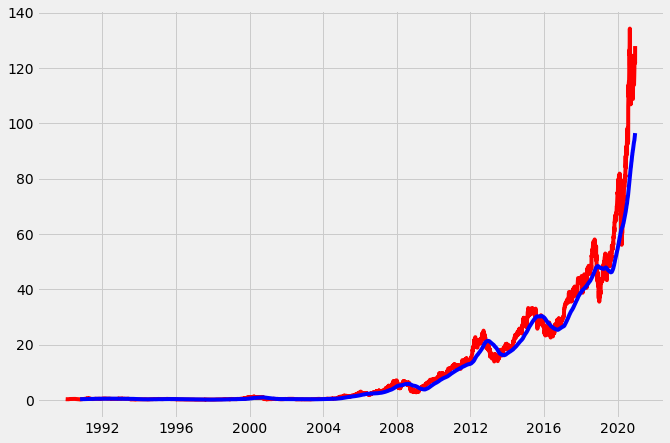

In [88]:
plt.figure(figsize = (10,7))
plt.plot(df.index
         , df.Apple
         , c='r'
        )
plt.plot(df.index[199:]
         , avg200_lst
         , c='b'
        );

## Box plot

In [89]:
df.sample(10)

,Apple,Microsoft,IBM,Intel,AMD,Oracle,HP
Date,,,,,,,
2009-02-27,3.189643,16.150000,92.029999,12.740000,2.180000,15.540000,23.660000
1992-01-15,0.566964,2.739583,23.843750,1.750000,9.625000,0.456790,5.343750
2014-12-22,28.235001,47.980000,161.440002,37.209999,2.660000,45.650002,69.930000
2002-10-03,0.255357,22.400000,60.000000,13.840000,3.630000,8.330000,13.305000
1990-01-05,0.337054,0.622396,24.937500,1.109375,3.812500,0.515432,8.125000
2014-08-13,24.309999,44.080002,187.949997,34.099998,4.110000,40.240002,102.260002
2020-01-08,75.797501,160.089996,135.309998,58.970001,47.830002,54.130001,45.580002
2006-01-26,2.583214,26.500000,80.720001,21.490000,40.410000,12.440000,36.775002
2005-09-01,1.652143,27.200001,79.540001,25.260000,20.879999,13.310000,29.540001


<AxesSubplot:xlabel='Date'>

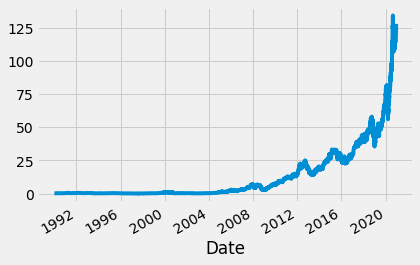

In [90]:
df.Apple.plot()

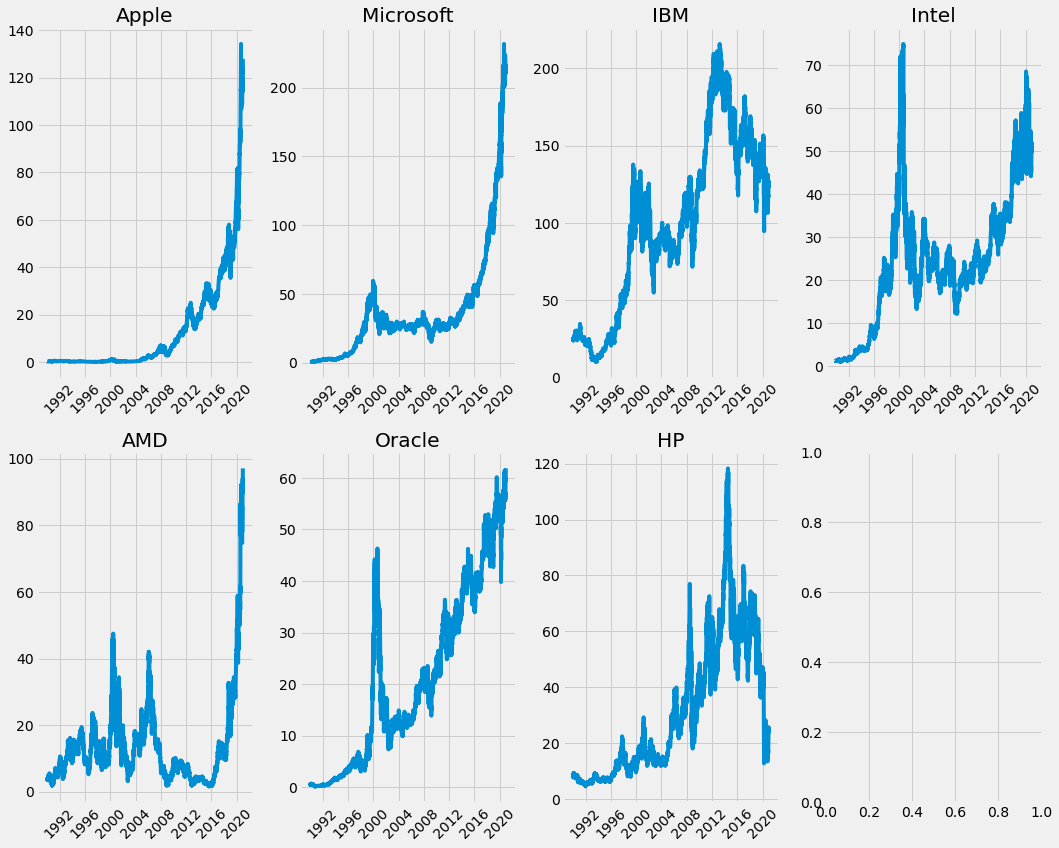

In [91]:
fig, axs = plt.subplots(2
                        , 4
                        , tight_layout = True
                        , figsize = (15, 12)
                       )

axs[0, 0].plot(df.Apple)
axs[0, 0].set_title('Apple')
axs[0, 0].tick_params('x', labelrotation=45)
# axs[0, 0].set_xticklabels([x for x in range(1992, 2021, 4)], rotation = 45)

axs[0, 1].plot(df.Microsoft)
axs[0, 1].set_title('Microsoft')
axs[0, 1].tick_params('x', labelrotation=45)

axs[0, 2].plot(df.IBM)
axs[0, 2].set_title('IBM')
axs[0, 2].tick_params('x', labelrotation=45)

axs[0, 3].plot(df.Intel)
axs[0, 3].set_title('Intel')
axs[0, 3].tick_params('x', labelrotation=45)

axs[1, 0].plot(df.AMD)
axs[1, 0].set_title('AMD')
axs[1, 0].tick_params('x', labelrotation=45)

axs[1, 1].plot(df.Oracle)
axs[1, 1].set_title('Oracle')
axs[1, 1].tick_params('x', labelrotation=45)

axs[1, 2].plot(df.HP)
axs[1, 2].set_title('HP')
axs[1, 2].tick_params('x', labelrotation=45);

# columns = [x for x in df.columns]
# idx = 0
# for x in range(0,2): # row indices
#     for y in range(0, 4): # column indices
#         try: 
#             axs[x, y].plot(df[columns[idx]])
#             axs[x, y].set_title(df.columns[idx])
#             idx = idx + 1
#         except:
#             pass

In [92]:
df.index.year.unique()[::3]

Int64Index([1990, 1993, 1996, 1999, 2002, 2005, 2008, 2011, 2014, 2017, 2020], dtype='int64', name='Date')

In [93]:
(2020-1990)/8

3.75

In [94]:
[x for x in range(1992, 2021, 4)]

[1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]

In [95]:
df.columns[2]

'IBM'

In [96]:
df.head(1)

,Apple,Microsoft,IBM,Intel,AMD,Oracle,HP
Date,,,,,,,
1990-01-02,0.332589,0.616319,24.5,1.125,4.125,0.595679,8.625


In [97]:
df.index

DatetimeIndex(['1990-01-02', '1990-01-03', '1990-01-04', '1990-01-05',
               '1990-01-08', '1990-01-09', '1990-01-10', '1990-01-11',
               '1990-01-12', '1990-01-15',
               ...
               '2020-12-02', '2020-12-03', '2020-12-04', '2020-12-07',
               '2020-12-08', '2020-12-09', '2020-12-10', '2020-12-11',
               '2020-12-14', '2020-12-15'],
              dtype='datetime64[ns]', name='Date', length=7801, freq=None)

In [98]:
for x in range(0,2):
    for y in range(0,4):
        print(x,y)

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3


In [99]:
range(1,10)

range(1, 10)

In [100]:
df.columns[1]

'Microsoft'

In [101]:
[x for x in df.columns] # list comprehension 

['Apple', 'Microsoft', 'IBM', 'Intel', 'AMD', 'Oracle', 'HP']

In [102]:
columns = []
for x in df.columns:
    columns.append(x)
columns

['Apple', 'Microsoft', 'IBM', 'Intel', 'AMD', 'Oracle', 'HP']

### Prophet Predictions

In [103]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [104]:
apple_df = df['Apple'].to_frame()
apple_df.reset_index(level=0, inplace=True)
apple_df.rename(columns = {'Date': 'ds', 'Apple': 'y'}, inplace=True)
apple_df.head()

,ds,y
0,1990-01-02,0.332589
1,1990-01-03,0.334821
2,1990-01-04,0.335938
3,1990-01-05,0.337054
4,1990-01-08,0.339286


In [105]:
apple_model = Prophet(interval_width = 0.95, daily_seasonality=True)
apple_model.fit(apple_df)

In [106]:
apple_forecast = apple_model.make_future_dataframe(periods = 144)
apple_forecast = apple_model.predict(apple_forecast)

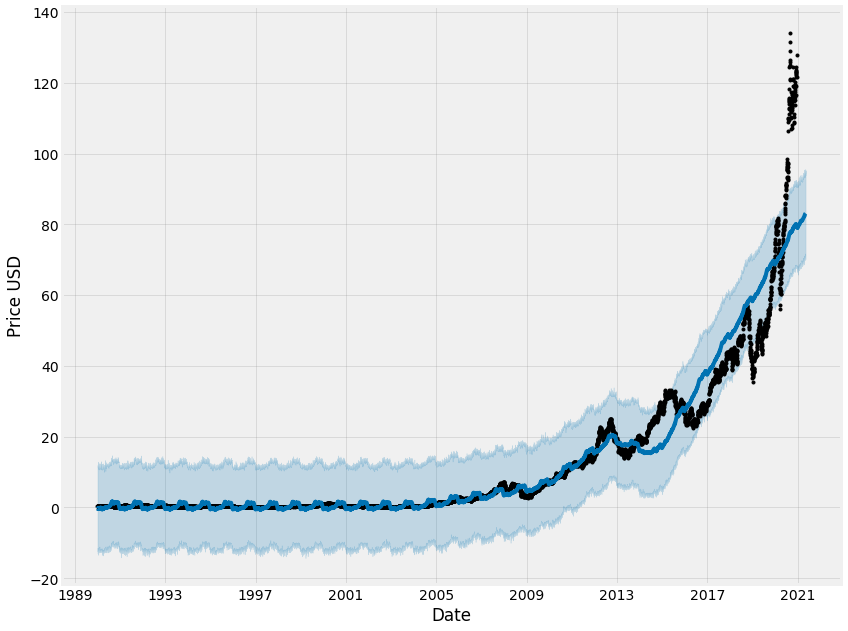

In [107]:
apple_model.plot(apple_forecast
                 , xlabel = 'Date'
                 , ylabel = 'Price USD'
                 , figsize = (12,9)
                );

## Monte Carlo Simulation 

In [108]:
apple = apple[['Date', 'Close']]
apple.head()

,Date,Close
0,1990-01-02,0.332589
1,1990-01-03,0.334821
2,1990-01-04,0.335938
3,1990-01-05,0.337054
4,1990-01-08,0.339286


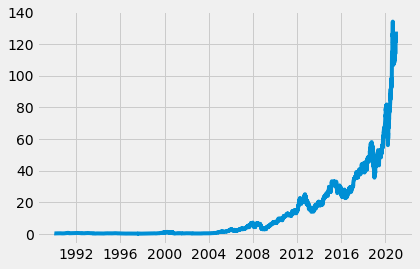

In [109]:
plt.plot(apple.Date
         , apple.Close
        );

In [110]:
apple['Previous_Close'] = apple.Close.shift(1)
apple.head()

,Date,Close,Previous_Close
0,1990-01-02,0.332589,NaN
1,1990-01-03,0.334821,0.332589
2,1990-01-04,0.335938,0.334821
3,1990-01-05,0.337054,0.335938
4,1990-01-08,0.339286,0.337054


In [111]:
apple = apple.iloc[1:]
apple.head()

,Date,Close,Previous_Close
1,1990-01-03,0.334821,0.332589
2,1990-01-04,0.335938,0.334821
3,1990-01-05,0.337054,0.335938
4,1990-01-08,0.339286,0.337054
5,1990-01-09,0.335938,0.339286


In [112]:
# Calculate Periodic Daily Return
apple['PDR'] = np.log(apple.Close / apple.Previous_Close)
apple.head()

,Date,Close,Previous_Close,PDR
1,1990-01-03,0.334821,0.332589,0.006689
2,1990-01-04,0.335938,0.334821,0.003328
3,1990-01-05,0.337054,0.335938,0.003317
4,1990-01-08,0.339286,0.337054,0.006601
5,1990-01-09,0.335938,0.339286,-0.009917


In [113]:
# Test np.log is ln(x)
np.log(np.exp(1))

1.0

In [114]:
# Calculate Drift 
Drift = apple.PDR.mean() - apple.PDR.var() / 2
# Drift = 0 # can use zero in this instance
Drift

0.000362502414256767

In [115]:
# Import random
import random
# Test list of 10 random numbers
[random.random() for _ in range(10)]

[0.6480044468450239,
 0.9176229637369517,
 0.14000345216671983,
 0.8845156466897609,
 0.6393480900220384,
 0.3046292363224433,
 0.7466485523897767,
 0.3006220475310343,
 0.4264856379078418,
 0.9425677223782997]

In [116]:
# Make Monte Carlo Predictions
from scipy import stats
sigma = apple.PDR.std()
apple.MC_Pred = 0
apple.loc[1, 'MC_Pred'] = apple.loc[1, 'Close'] * np.exp(Drift + sigma * stats.norm.ppf(random.random(), 0, 1))
for i in range(2, len(apple)+1):
    apple.loc[i, 'MC_Pred'] = apple.loc[i-1, 'MC_Pred'] * np.exp(Drift + sigma * stats.norm.ppf(random.random(), 0, 1))
apple.head()

,Date,Close,Previous_Close,PDR,MC_Pred
1,1990-01-03,0.334821,0.332589,0.006689,0.343649
2,1990-01-04,0.335938,0.334821,0.003328,0.349610
3,1990-01-05,0.337054,0.335938,0.003317,0.328601
4,1990-01-08,0.339286,0.337054,0.006601,0.321244
5,1990-01-09,0.335938,0.339286,-0.009917,0.317228


In [117]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7800 entries, 1 to 7800
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            7800 non-null   datetime64[ns]
 1   Close           7800 non-null   float64       
 2   Previous_Close  7800 non-null   float64       
 3   PDR             7800 non-null   float64       
 4   MC_Pred         7800 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 304.8 KB


In [118]:
len(apple['MC_Pred'])

7800

In [119]:
apple.MC_Pred = apple['MC_Pred']

In [120]:
len(apple.MC_Pred)

7800

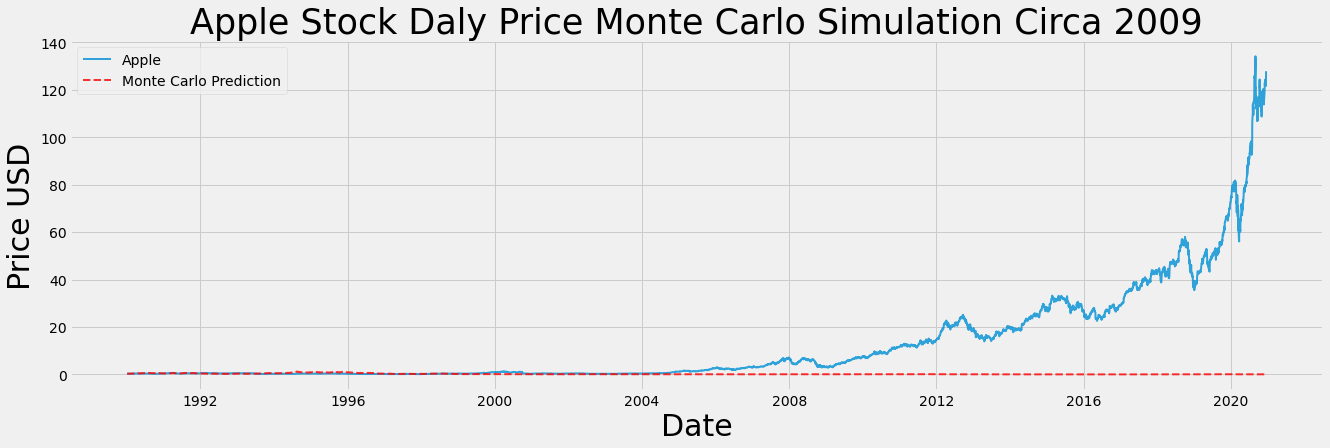

In [121]:
plt.figure(figsize = (20,6))
plt.plot(apple.Date
         , apple.Close
         , label = 'Apple'
         , alpha = 0.8
         , linewidth = 2
        )
plt.plot(apple.Date
         , apple.MC_Pred
         , 'r--'
         , label = 'Monte Carlo Prediction'
         , linewidth = 2
         , alpha = 0.8
        )
plt.legend()
plt.title('Apple Stock Daly Price Monte Carlo Simulation Circa 2009'
          , fontsize = 35
         )
plt.xlabel('Date'
           , fontsize = 30
          )
plt.ylabel('Price USD'
           , fontsize = 30
          );

In [122]:
# Make a function
def monte_stocks(ticker, date):
    pass